In [1]:
import Statistics.std
import Plots
import Distributions
using Statistics
using LinearAlgebra

# CHEMENG 4H03: Assignment #3

*Ernest Spahiu 400197077, March 12. 2024* 


##### Q1: Expectation-Maximization (EM) Algorithm for fitting a Gaussian Mixture Model (GMM)

**1. a)**

Background: In this scenario we were given 2 guassian mixture models, each with a mu (mean of the distribution), sigma (covariance matrix determining spread and orientation) and a weighing factor alpha. 20 iterations of the EM method were used to find the locally-maximal likelihood estimates of the model parameters, given as the mu and sigma matrices in the question. 

2×2 Matrix{Float64}:
 4.07002  4.24861
 4.24861  5.52491

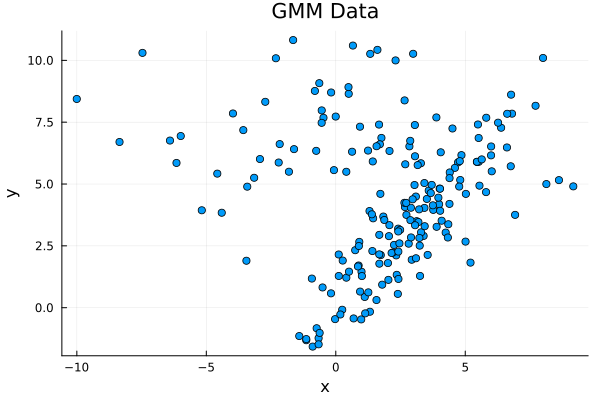

In [2]:
using Plots

alpha1 = 0.376463
alpha2 = 0.623537

mu1 = [0.640507; 6.57384]
mu2 = [2.73496; 3.08972]

sigma1 = [15.9680 -1.50472; 1.50472 4.42451]
sigma2 = [4.07002 4.24861; 4.24861 5.52491]
display(sigma2)

#import gmm data given as 2 columns, x and y
using DelimitedFiles
data = readdlm("gmmData.csv", ',', skipstart=1)
x = data[:,1]
y = data[:,2]
scatter(x, y, xlabel="x", ylabel="y", title="GMM Data", legend=false)

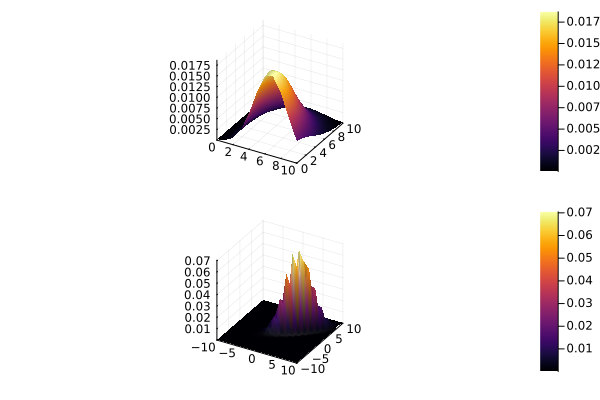

In [3]:
using Distributions
using LinearAlgebra
using Plots

#1a)
#use MvNormal(mu, sigma) to define the distribution of each cluster
#cluster 1
dist1 = MvNormal(mu1, Hermitian(sigma1)) #use Hermitian to ensure that positive definite
dist2 = MvNormal(mu2, Hermitian(sigma2))

#eval pdf of each distribution at each point
pdf1 = [pdf(dist1,[i,j]) for i in 0:10, j in 0:10]
plot1 = plot(0:10,0:10,pdf1,st=:surface)
pdf2 = [pdf(dist2,[i,j]) for i in -10:10, j in -10:10]
plot2 = plot(-10:10,-10:10,pdf2,st=:surface)

pdf1 = [pdf(dist1,[i,j]) for i in -20:20, j in -20:20]
pdf2 = [pdf(dist2,[i,j]) for i in -20:20, j in -20:20]

plot(plot1, plot2, layout = (2, 1), legend = true)

Supposing that the data has been sampled by a weighted sum of multivariate normal distributions, and given 2 GMM models in this question, its possible to seperate the data into at least 2 distinct clusters. To do this, each cluster was defined as a multivariate normal distribution with the given mu and sigma values using **MvNormal()**. The pdf() function was then applied on a grid of points to define a pdf distribituion. The weighing factor alpha was then applied and the formula given in class (see below) was used to calculate the posterior probability of a point x being in either of the clusters.

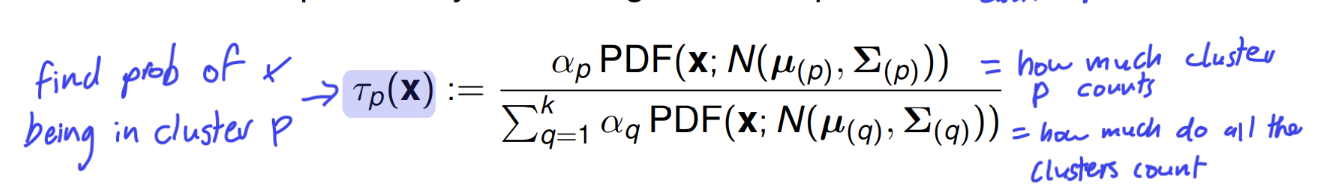

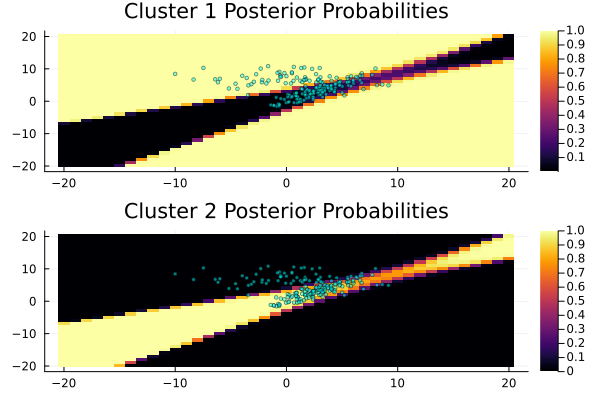

In [4]:
#for each point x, find posterir probabilities of x belonging to each cluster
#forula is taup_x = alpha1 * pdf1(x) / (alpha1 * pdf1(x) + alpha2 * pdf2(x))

#cluster 1
taupc1_x = zeros(41,41)
for i in 1:41
    for j in 1:41
        taupc1_x[i,j] = (alpha1 .* pdf1[i,j]) ./ (alpha1 .* pdf1[i,j] + alpha2 .* pdf2[i,j])
    end
end

#cluster 2
taupc2_x = zeros(41,41)
for i in 1:41
    for j in 1:41
        taupc2_x[i,j] = (alpha2 .* pdf2[i,j]) ./ ((alpha1 .* pdf1[i,j]) + alpha2 .* pdf2[i,j])
    end
end
#plot taupc1_x as 2d surface

plot1 = heatmap(-20:20, -20:20,taupc1_x,  title="Cluster 1 Posterior Probabilities")
scatter!(x, y, legend=false, markersize=2, color=:cyan, alpha=0.5)
plot2 = heatmap(-20:20, -20:20,taupc2_x, title="Cluster 2 Posterior Probabilities")
scatter!(x, y, legend=false, markersize=2, color=:cyan, alpha=0.5)
plot(plot1, plot2, layout = (2, 1), legend = false)

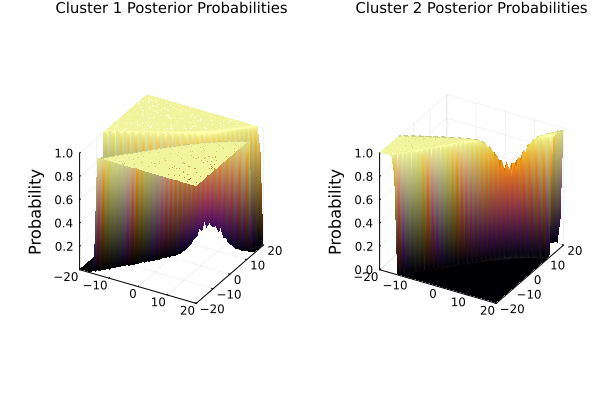

In [5]:
#plot in 3d
plot1 = plot(-20:20,-20:20,taupc1_x,st=:surface, 
title="Cluster 1 Posterior Probabilities", titlefontsize=10, legend=false, zlabel="Probability")
plot2 = plot(-20:20,-20:20,taupc2_x,st=:surface, 
title="Cluster 2 Posterior Probabilities", titlefontsize=10, legend=false, zlabel="Probability")
plot(plot1, plot2, layout = (1, 2))

The posterior probility (pp) of a point x describes the probability that x was generated by the corresponding component, ie: the probability of it belonging to that cluster given a set of clusters. This concept was used to classify the data into 2 clusters, which was visually depicted using a 3D Heatmap plot. 

The first plot shows the data points (x and y values on either axis), and the color of the points represents the probability of the point belonging to the first cluster. A dark narrow valley region is clearly visible here, depicting very low pp's of the points in that region belonging to cluster1. The sorrounding regions on the top and bottom have pp's close to 1, meaning that the points in those regions are very likely to belong to cluster1. In contrast, the opposite is true for cluster2, where the valley has now become a ridge of high pp's, and the top and bottom regions have pp's close to 0. 

A 3D plot was also generated to show visualize these regions more easily. In this view, the less definitive regions are also highlighted. The boundaries between the clusters are more jagged and appear purple-redish, indiciating that pp's are no longer on the extremes of 0 and 1. This is also evident at the narrowest part of the valley, where a small hill appears to form due to some higher cluster2 pp's.


**1. b)**

The k-means algorithm was applied using the procedure given in lecture, with the euclidian distance as the decision metric. The method was first done using 2 clusters, and then 3 clusters, the final cluster centers were plotted and printed below.

[1.246124141, 6.352610089]
[5.450427853, 5.894941765]
Silhouette score for cluster 1: 0.1524873017323909
Silhouette score for cluster 2: 0.4664474554539145
Cluster 1 mean: [-0.08008805184644191, 3.523222636538391]
Cluster 2 mean: [4.268758933006437, 5.407644001262876]
Number of points in cluster 1: 1068
Number of points in cluster 2: 932


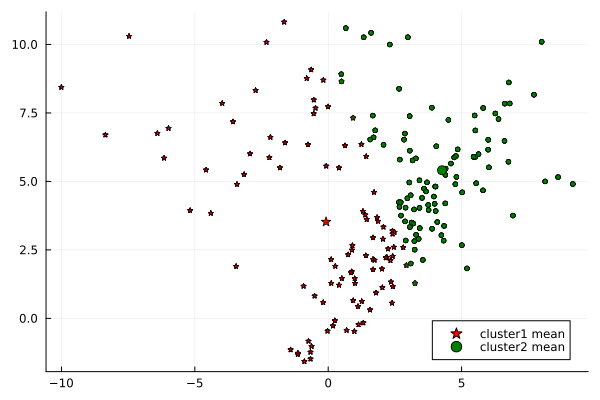

In [6]:
#1b)
#apply k-means clustering to the data

function distance_euclidean(x1, y1, x2, y2)
    return sqrt((x1 - x2)^2 + (y1 - y2)^2)
end
#choose initial cluster means as 2 random points from the data
cluster1_mean = [x[30], y[30]]
cluster2_mean = [x[50], y[50]]
println(cluster1_mean)
println(cluster2_mean)

#initialize clusters
cluster1 = []
cluster2 = []
for i in 1:10
    for j in 1:length(x)
        #find distance to each cluster center
        dist1 = distance_euclidean(x[j], y[j], cluster1_mean[1], cluster1_mean[2])
        dist2 = distance_euclidean(x[j], y[j], cluster2_mean[1], cluster2_mean[2])
        
        #assign to closest cluster
        if dist1 < dist2
            push!(cluster1, [x[j], y[j]])
        else
            push!(cluster2, [x[j], y[j]])
        end
    end
    #update cluster centers
    cluster1_mean = [mean([i[1] for i in cluster1]), mean([i[2] for i in cluster1])]
    cluster2_mean = [mean([i[1] for i in cluster2]), mean([i[2] for i in cluster2])]
end

silhouette_score = 0
for i in 1:length(cluster1)
    a = mean([distance_euclidean(cluster1[i][1], cluster1[i][2], j[1], j[2]) for j in cluster1 if j != cluster1[i]])
    b = minimum([mean([distance_euclidean(cluster1[i][1], cluster1[i][2], j[1], j[2]) for j in cluster2])])
    silhouette_score += (b - a) / max(a, b)
end
silhouette_score_cluster1 = silhouette_score / length(cluster1)
println("Silhouette score for cluster 1: ", silhouette_score_cluster1)
silhouette_score = 0
for i in 1:length(cluster2)
    a = mean([distance_euclidean(cluster2[i][1], cluster2[i][2], j[1], j[2]) for j in cluster2 if j != cluster2[i]])
    b = minimum([mean([distance_euclidean(cluster2[i][1], cluster2[i][2], j[1], j[2]) for j in cluster1])])
    silhouette_score += (b - a) / max(a, b)
end
println("Silhouette score for cluster 2: ", silhouette_score / length(cluster2))

println("Cluster 1 mean: ", cluster1_mean)
println("Cluster 2 mean: ", cluster2_mean)

println("Number of points in cluster 1: ", length(cluster1))
println("Number of points in cluster 2: ", length(cluster2))

#plot the clusters
scatter([i[1] for i in cluster1], [i[2] for i in cluster1], label="", markershape=:star5, markersize=2.5, color=:red, alpha=0.5)
scatter!([i[1] for i in cluster2], [i[2] for i in cluster2], label="", markersize=2.5, color=:green, alpha=0.5)
scatter!([cluster1_mean[1]], [cluster1_mean[2]], markershape=:star5, label="cluster1 mean",markersize=5, color=:red)
scatter!([cluster2_mean[1]], [cluster2_mean[2]], label="cluster2 mean",markersize=5, color=:green, legend=true)

Cluster 1 mean: [1.7711316439185187, 2.0155114238984124]
Cluster 2 mean: [4.713444790820991, 6.036904419473767]
Cluster 3 mean: [-2.051799365515971, 7.33698679507862]


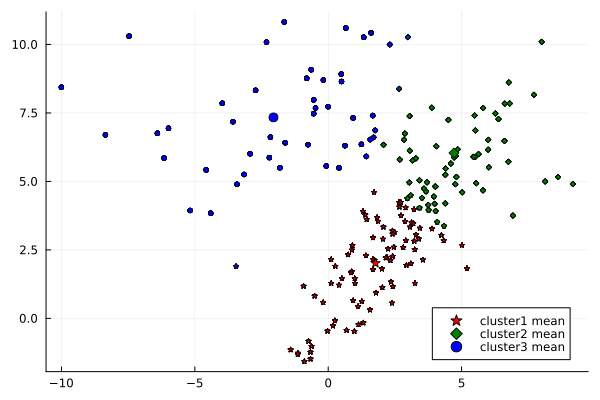

In [7]:
#1b continued
#3-cluster case
cluster1_mean = [x[1], y[1]]
cluster2_mean = [x[2], y[2]]
cluster3_mean = [x[3], y[3]]

cluster1 = []
cluster2 = []
cluster3 = []

for i in 1:20
    for j in 1:length(x)
        dist1 = distance_euclidean(x[j], y[j], cluster1_mean[1], cluster1_mean[2])
        dist2 = distance_euclidean(x[j], y[j], cluster2_mean[1], cluster2_mean[2])
        dist3 = distance_euclidean(x[j], y[j], cluster3_mean[1], cluster3_mean[2])
        
        if dist1 < dist2 && dist1 < dist3
            push!(cluster1, [x[j], y[j]])
        elseif dist2 < dist1 && dist2 < dist3
            push!(cluster2, [x[j], y[j]])
        else
            push!(cluster3, [x[j], y[j]])
        end
    end
    cluster1_mean = [mean([i[1] for i in cluster1]), mean([i[2] for i in cluster1])]
    cluster2_mean = [mean([i[1] for i in cluster2]), mean([i[2] for i in cluster2])]
    cluster3_mean = [mean([i[1] for i in cluster3]), mean([i[2] for i in cluster3])]
end

print("Cluster 1 mean: ", cluster1_mean, "\n")
print("Cluster 2 mean: ", cluster2_mean, "\n")
print("Cluster 3 mean: ", cluster3_mean, "\n")

scatter([i[1] for i in cluster1], [i[2] for i in cluster1], label="", markershape=:star5, markersize=2.5, color=:red, alpha=0.5)
scatter!([i[1] for i in cluster2], [i[2] for i in cluster2], label="", markershape=:diamond, markersize=2.5, color=:green, alpha=0.5)
scatter!([i[1] for i in cluster3], [i[2] for i in cluster3], label="", markersize=2.5, color=:blue, alpha=0.5)
scatter!([cluster1_mean[1]], [cluster1_mean[2]], markershape=:star5, label="cluster1 mean",markersize=5, color=:red)
scatter!([cluster2_mean[1]], [cluster2_mean[2]], markershape=:diamond, label="cluster2 mean",markersize=5, color=:green, legend=true)
scatter!([cluster3_mean[1]], [cluster3_mean[2]], label="cluster3 mean",markersize=5, color=:blue, legend=true)

**Performance Evaluation:**
The performance of the k-means algorithm is somewhat tricky to clearly define, since its an unsupervised learning method, and its unknown what is clearly in the "right" or "wrong" cluster. Qualitatively, it seems that that k-means did a relatively good job, as each of the clusters define distinct regions, and individual points of a cluster do not venture into another clusters territory. The means also seem reasonably placed, given the spread and position of the data points. There does not seem to be a massive difference in the number of points belonging to each cluster. 

For a more quantitive approach, the silhoutte score was calculated (b-a/max(a,b)), which is a commonly used metric to evaluate the goodness of a clustering technique. The score ranges from -1 to 1, where 1 indicates that the clusters are well apart from each other and clearly distinguished, and -1 indicates that the clusters are overlapping. The score was calculated for both the 2 and 3 cluster cases, and the results are printed below. The score for the 2 cluster case was a total of 0.6, and the score for the 3 cluster case slightly lower, which is expected, as the distance between clusters is reduced. These values agree with the qualitative assessment of the k-means algorithm, and suggest that the algorithm did an OK job. Source: [Article](https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c)

Computational performance: Since there are 2 for loops, the time complexity is n^2, and therefore the algorithm suffers from both high iteration counts and large data sets, since it has to loop through each point in the data set and then do the distance checks. In general, its probably wise to use k-means for smaller sets, and to set a threshold/tolerance/max # of iterations, so that the algorithm does not run indefinitely.

**1. c)**

All x measurements were scaled by a factor of 10^4, and k-means was applied again under the same scenario, with the same starting points. The result was slightly different than the unscaled case, both in terms of mean positions and points allocated to each cluster. 

Cluster 1 mean: [-0.08008805184644191, 3.523222636538391]
Cluster 2 mean: [4.268758933006437, 5.407644001262876]
vs
Scaled Cluster 1 mean: [-1746.2691217485815, 3.9778899615661634]
Scaled Cluster 2 mean: [43287.734174851365, 4.876983445502124]

The x position is understandibly different, due to the scaling factor, but it is not scaled by exactly 10^4. The y position is also different, meaning that the scaling factor has also affected the y positions and therefore the "territory" of the cluster, as the means are different. Qualitatively, there are quite a few more green points near the right side of the plot, and therefore less red poinds. In general there are more points now assigned to cluster 2 and less in 1, compared to the unscaled case.

**Reasoning**: Given that this algo is using the euclidian distance (sqrt((x1 - x2)^2 + (y1 - y2)^2)) as the cluster assignment logic, the scaling factor has a significant impact on the euclidian result and therefore the final cluster shapes. The high scaling value applied to the x's makes them susceptible to "dominating" the euclidian distance compared to the y-values. This has the consequence of overvaluing the x-values that are far apart compared to y-values that are far apart. This can be observed by the lower mean y in cluster 2 for the scaled case, and the lower number of red points, as the x-axis has essentially been stretched by a large factor and therefore has also stretched the shapes of the clusters toward that direction.

Cluster 1 mean: [-1746.2691217485815, 3.9778899615661634]
Cluster 2 mean: [43287.734174851365, 4.876983445502124]
Number of points in cluster 1: 1058
Number of points in cluster 2: 942


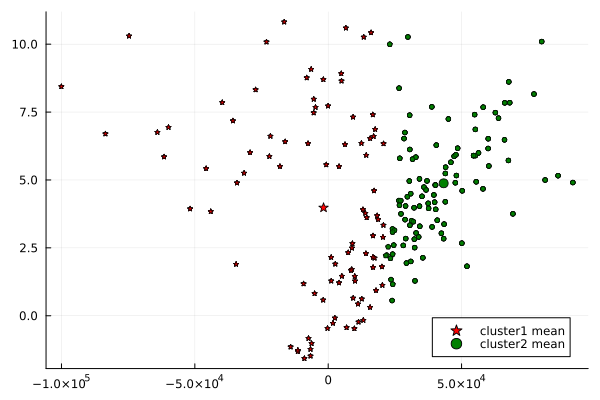

In [8]:
#1c)
#repeat procedure, now multiplying x (first col of dataset) by 10**4
x_scaled = x .* 10^4
#choose initial cluster means as 2 random points from the data
cluster1_mean = [x_scaled[30], y[30]]
cluster2_mean = [x_scaled[50], y[50]]

#initialize clusters
cluster1 = []
cluster2 = []

for i in 1:10
    for j in 1:length(x_scaled)
        dist1 = distance_euclidean(x_scaled[j], y[j], cluster1_mean[1], cluster1_mean[2])
        dist2 = distance_euclidean(x_scaled[j], y[j], cluster2_mean[1], cluster2_mean[2])
        
        if dist1 < dist2
            push!(cluster1, [x_scaled[j], y[j]])
        else
            push!(cluster2, [x_scaled[j], y[j]])
        end
    end
    cluster1_mean = [mean([i[1] for i in cluster1]), mean([i[2] for i in cluster1])]
    cluster2_mean = [mean([i[1] for i in cluster2]), mean([i[2] for i in cluster2])]
end

print("Cluster 1 mean: ", cluster1_mean, "\n")
print("Cluster 2 mean: ", cluster2_mean, "\n")

println("Number of points in cluster 1: ", length(cluster1))
println("Number of points in cluster 2: ", length(cluster2))

scatter([i[1] for i in cluster1], [i[2] for i in cluster1], label="", markershape=:star5, markersize=2.5, color=:red, alpha=0.5)
scatter!([i[1] for i in cluster2], [i[2] for i in cluster2], label="", markersize=2.5, color=:green, alpha=0.5)
scatter!([cluster1_mean[1]], [cluster1_mean[2]], markershape=:star5, label="cluster1 mean",markersize=5, color=:red)
scatter!([cluster2_mean[1]], [cluster2_mean[2]], label="cluster2 mean",markersize=5, color=:green, legend=true)